# **빅데이터 개론 Lab 11 - 로지스틱 회귀분석**
실습관련 질문 : jjbblue12@hallym.ac.kr (전준범 조교 공학관 1314호 데이터베이스 연구실 )

실습 영상은 Google Colaboratory을 이용하여 진행.

notebook 파일 제공 예정
## **- 로지스틱 회귀분석**
- - -
참고자료 : https://www.notion.so/TA-2689a38b5289413a82671d3956fea103

- - -




### **<로지스틱 회귀분석>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMjUg/MDAxNTg0MDgwNjAzNDQ4.stg44EjmKsUiCbav6P4HPZpzQocCNcN3L6DUwQBC5lgg.25bRo94dsEGXtmZ-Z0CtQhXKlTVkkz3E5VPaq0oNvXog.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C4.PNG?type=w800" width="600" height="300">


<br>

### **<독립변수(설명변수)와 종속변수(반응변수)의 관계>**

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTNfMTc3/MDAxNTg0MDgwNjAzNDQy.lXx6Ca-LIa0kaeCULOE9wWqUQsZt1KzSOZDKsRpwbREg._lAOicl-kDpLz4SYa9_37_rYCtUNhL_IYFOMYz4v-Hgg.PNG.y4769/%EC%8A%AC%EB%9D%BC%EC%9D%B4%EB%93%9C6.PNG?type=w800" width="600" height="300">

  1. 선형 회귀분석이 말 그대로 독립변수와 종속변수 사이의 선형적 관계를 그래프로 나타낸 것이라면, 로지스틱 회귀분석은 선형이 아닌 "S" 곡선의 특성을 나타낸다.

  2. 로지스틱 회귀분석의 곡선에서 종속변수의 확률이 0.5보다 크면 어떤 사건이 일어난다고 보고, 0.5보다 작으면 어떤 사건이 일어나지 않을 것이라고 확률적으로 예측해볼 수 있다.




```
glm(formula, data, family = "binomial") 
# binomial 옵션은 반응변수가 두 가지의 값(이항)만 가진다고 glm에게 알려줌
```


In [ ]:
install.packages(c("tidyverse", "data.table", "caret", "e1071", "Hmisc"))
library(tidyverse)
library(data.table)
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following obj

#### **A. 예제 1**

---


* https://www.kaggle.com/c/titanic/data

**<kaggle의 타이타닉 data>**

  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [ ]:
#@title
DF <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble()

In [ ]:
DF %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
DF %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [ ]:
str(DF)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


* 범주형 변수 확인

In [ ]:
#@title
DF$Survived %>% unique()
DF$Pclass %>% unique()
DF$Sex %>% unique()
DF$Ticket %>% unique()
DF$Embarked %>% unique()

DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)
summary(DF)

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

* 결측값 처리

In [ ]:
DF <- DF %>% na.omit()
summary(DF)

 Survived     Pclass          Sex           Age            SibSp       
 0:424    Min.   :1.000   female:261   Min.   : 0.42   Min.   :0.0000  
 1:290    1st Qu.:1.000   male  :453   1st Qu.:20.12   1st Qu.:0.0000  
          Median :2.000                Median :28.00   Median :0.0000  
          Mean   :2.237                Mean   :29.70   Mean   :0.5126  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:130   
 Median :0.0000   Median : 15.74   Q: 28   
 Mean   :0.4314   Mean   : 34.69   S:554   
 3rd Qu.:1.0000   3rd Qu.: 33.38           
 Max.   :6.0000   Max.   :512.33           

* Hmisc::impute을 이용한 NA 값 대체(평균, 중앙값, 특정 숫자)

* https://m.blog.naver.com/PostView.nhn?blogId=tjdudwo93&logNo=221142961499&proxyReferer=https:%2F%2Fwww.google.com%2F

In [ ]:
#@title
library(Hmisc)
DF$Age <- impute(DF$Age, median) 

* train / test 분리

In [ ]:
#@title
index <- caret::createDataPartition(y = DF$Survived, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male   22           1     0  7.25 S       
 2 1             1 female 38           1     0 71.3  C       
 3 1             3 female 26           0     0  7.92 S       
 4 1             1 female 35           1     0 53.1  S       
 5 0             3 male   35           0     0  8.05 S       
 6 0             3 male   28           0     0  8.46 Q       
 7 0             1 male   54           0     0 51.9  S       
 8 0             3 male    2           3     1 21.1  S       
 9 1             3 female 27           0     2 11.1  S       
10 1             2 female 14           1     0 30.1  C       
# … with 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             2 male   35           0     0 26    "S"     
 2 1    

In [ ]:
str(train)

tibble [803 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int [1:803] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : 'impute' Named num [1:803] 22 38 26 35 35 28 54 2 27 14 ...
  ..- attr(*, "names")= chr [1:803] "1" "2" "3" "4" ...
  ..- attr(*, "imputed")= int [1:162] 6 18 20 26 28 29 38 41 42 43 ...
 $ SibSp   : int [1:803] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:803] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:803] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


* **train set을 이용한 glm 모델 생성**

In [ ]:
m <- glm(Survived ~ ., data = train, family = "binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6330  -0.5817  -0.4191   0.6345   2.4509  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.107910 535.411555   0.032  0.97451    
Pclass       -1.143617   0.149723  -7.638 2.20e-14 ***
Sexmale      -2.722893   0.210609 -12.929  < 2e-16 ***
Age          -0.040294   0.008314  -4.846 1.26e-06 ***
SibSp        -0.301323   0.112283  -2.684  0.00728 ** 
Parch        -0.096762   0.123567  -0.783  0.43359    
Fare          0.001250   0.002339   0.535  0.59291    
EmbarkedC   -11.773705 535.411285  -0.022  0.98246    
EmbarkedQ   -11.693566 535.411348  -0.022  0.98258    
EmbarkedS   -12.143592 535.411265  -0.023  0.98190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual devian

* feature selection

In [ ]:
m2 <- step(m, direction = "backward")

Start:  AIC=728.79
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   712.66 726.66
- Fare      1   709.09 727.09
- Parch     1   709.42 727.42
<none>          708.79 728.79
- SibSp     1   717.22 735.22
- Age       1   734.22 752.22
- Pclass    1   768.80 786.80
- Sex       1   919.72 937.72

Step:  AIC=726.66
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Fare    1   713.55 725.55
- Parch   1   713.61 725.61
<none>        712.66 726.66
- SibSp   1   722.50 734.50
- Age     1   738.04 750.04
- Pclass  1   773.75 785.75
- Sex     1   935.44 947.44

Step:  AIC=725.55
Survived ~ Pclass + Sex + Age + SibSp + Parch

         Df Deviance    AIC
- Parch   1   714.19 724.19
<none>        713.55 725.55
- SibSp   1   722.79 732.79
- Age     1   739.42 749.42
- Pclass  1   817.08 827.08
- Sex     1   938.04 948.04

Step:  AIC=724.19
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<

In [ ]:
summary(m2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6899  -0.6006  -0.4119   0.6296   2.4307  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.195801   0.502494  10.340  < 2e-16 ***
Pclass      -1.187197   0.126023  -9.420  < 2e-16 ***
Sexmale     -2.739261   0.204337 -13.406  < 2e-16 ***
Age         -0.039976   0.008215  -4.866 1.14e-06 ***
SibSp       -0.338139   0.107811  -3.136  0.00171 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  714.19  on 798  degrees of freedom
AIC: 724.19

Number of Fisher Scoring iterations: 5


* **예측**

In [ ]:
test %>% show()

# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             2 male   35           0     0 26    "S"     
 2 1             2 male   34           0     0 13    "S"     
 3 0             3 male   28           0     0  7.22 "C"     
 4 1             3 female 28           0     0  7.88 "Q"     
 5 1             3 male   28           0     0  7.23 "C"     
 6 0             3 male   28           0     0  8.05 "S"     
 7 0             3 male   21           0     0  7.8  "S"     
 8 1             1 female 49           1     0 76.7  "C"     
 9 1             2 female  5           1     2 27.8  "S"     
10 1             1 female 38           0     0 80    ""      
# … with 78 more rows


In [ ]:
predict_value <- predict(m2, test, type = "response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 88 × 1
   predict_value
           <dbl>
 1        0.211 
 2        0.218 
 3        0.0976
 4        0.626 
 5        0.0976
 6        0.0976
 7        0.125 
 8        0.847 
 9        0.907 
10        0.923 
# … with 78 more rows


In [ ]:
predict_check <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.211 
 2 1               0.218 
 3 0               0.0976
 4 1               0.626 
 5 1               0.0976
 6 0               0.0976
 7 0               0.125 
 8 1               0.847 
 9 1               0.907 
10 1               0.923 
# … with 78 more rows


* cut-off value 설정
 - predict_value > 0.5, Survived 1(생존)
 - predict_value <= 0.5, Survived 0(사망)

In [ ]:
predict_cutoff <- predict_check %>% mutate(predict_value_cutoff = as.factor(ifelse(predict_value > 0.5, 1, 0)))
predict_cutoff %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_value_cutoff
   <fct>            <dbl> <fct>               
 1 0               0.211  0                   
 2 1               0.218  0                   
 3 0               0.0976 0                   
 4 1               0.626  1                   
 5 1               0.0976 0                   
 6 0               0.0976 0                   
 7 0               0.125  0                   
 8 1               0.847  1                   
 9 1               0.907  1                   
10 1               0.923  1                   
# … with 78 more rows


* Confusion Matrix(실제값과 모델에 의한 분류값을 비교하는 테이블)

![png](https://github.com/Jin0331/TA/blob/master/image/confusion_m.png?raw=true)

https://yamalab.tistory.com/50

In [ ]:
caret::confusionMatrix(predict_cutoff$Survived, predict_cutoff$predict_value_cutoff)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 47  7
         1 10 24
                                          
               Accuracy : 0.8068          
                 95% CI : (0.7088, 0.8832)
    No Information Rate : 0.6477          
    P-Value [Acc > NIR] : 0.0008423       
                                          
                  Kappa : 0.5858          
                                          
 Mcnemar's Test P-Value : 0.6276258       
                                          
            Sensitivity : 0.8246          
            Specificity : 0.7742          
         Pos Pred Value : 0.8704          
         Neg Pred Value : 0.7059          
             Prevalence : 0.6477          
         Detection Rate : 0.5341          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.7994          
                                          
       'Positive' Class : 0               
                                    

* ROC curve와 AUC
 - 여기서 하나 주의할 점은, 위에서 cut-off value를 0.5로 하여 분류했다는 것. 이 cut-off value가 중요한 이유는 그 값에 따라 분류가 천차만별이기 때문에, 모든 cut-off value를 고려하여 결과값의 변화를 살펴봐야하는데, 그 방법을 ROC curve라고 한다.

![png](https://github.com/Jin0331/TA/blob/master/image/AUC.png?raw=true)

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("pROC")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



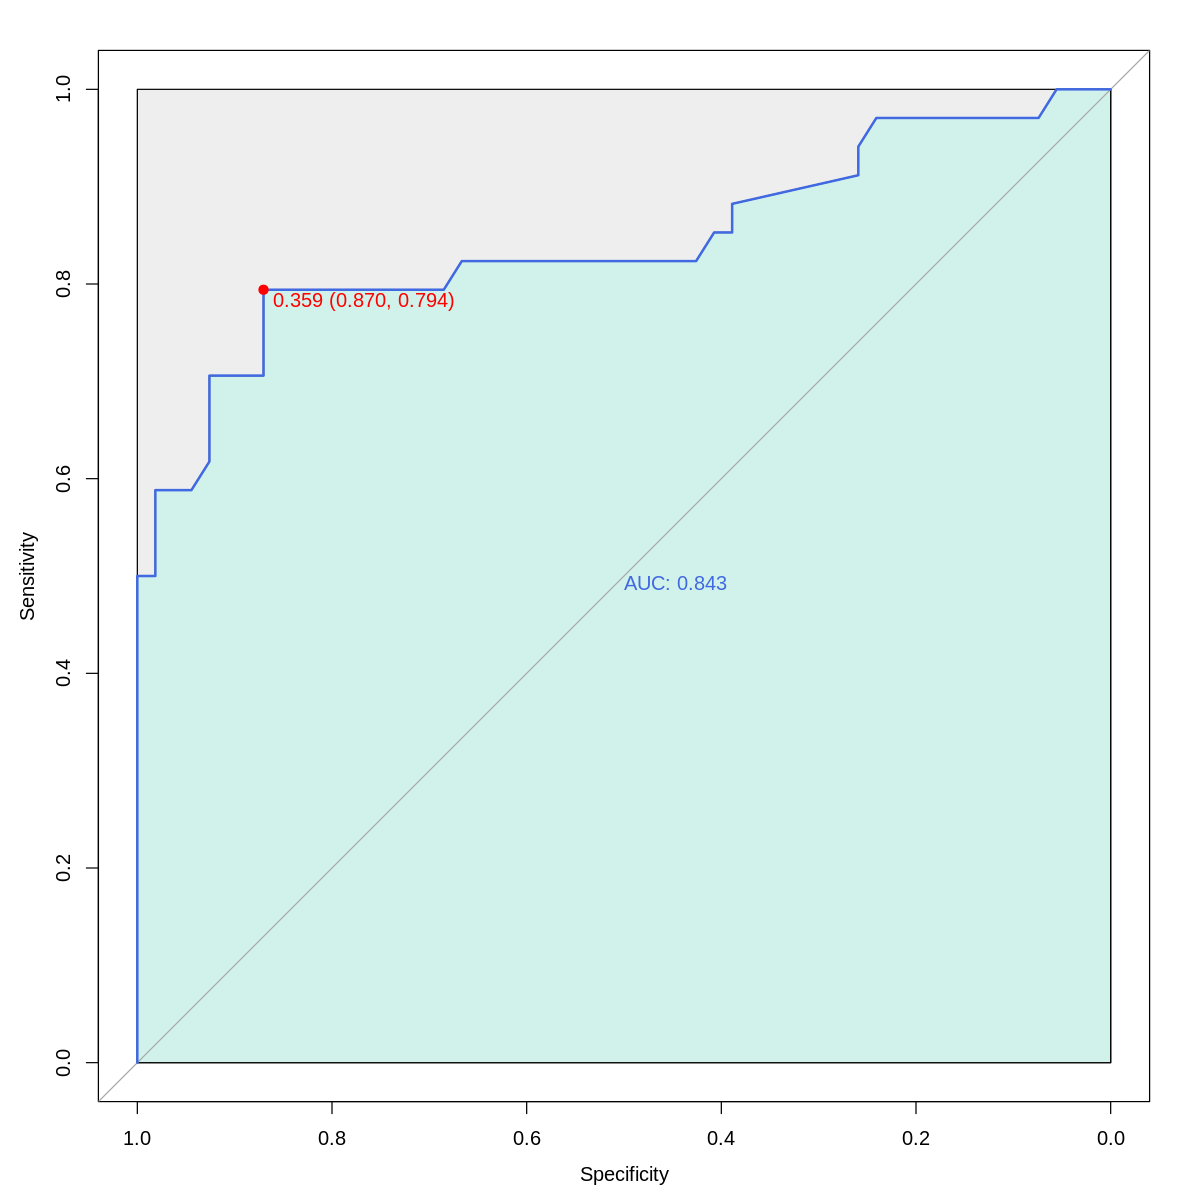

In [ ]:
roc_c <- roc(predict_cutoff$Survived, predict_cutoff$predict_value) # 실제정답과 glm 예측된 확률
plot.roc(roc_c,   
        col="royalblue",  
        print.auc=TRUE, 
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")

In [ ]:
pROC::coords(roc_c, "best", ret = "threshold", transpose = F)

threshold
<dbl>
0.3590966


* 모델 재구성하지 않은 m 모델과 재구성한 m2비교

In [ ]:
predict_value_m2 <- predict(m, test, type = "response") %>% tibble(predict_value = .)
predict_check_m2 <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value_m2) 
roc_c_m2 <- roc(predict_check_m2$Survived, predict_check_m2$predict_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



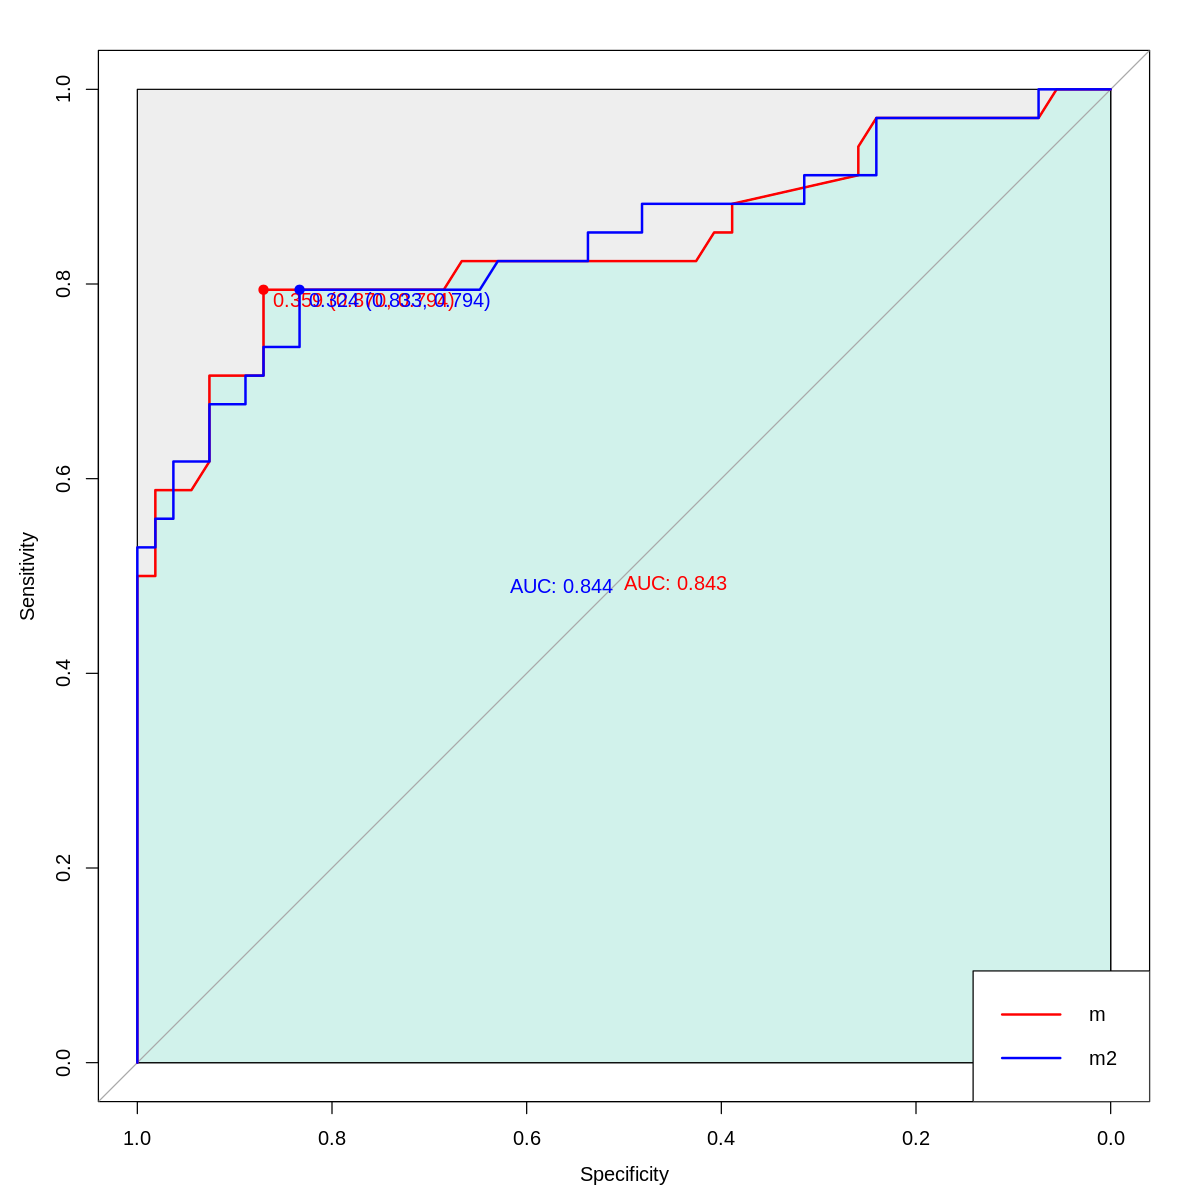

In [ ]:
plot.roc(roc_c,   
         col = "red",   
         print.auc=T, 
         max.auc.polygon=T,   
         print.thres=T, print.thres.pch=19, print.thres.col = "red", 
         auc.polygon=T, auc.polygon.col="#D1F2EB")  

plot.roc(roc_c_m2,   
         add=T,   # 기본 그래프에 추가할 수 있도록 설정
         col="blue",  
         print.auc=T, print.auc.adj=c(1.11,1.2),
         print.thres=T, print.thres.pch=19, print.thres.col = "blue")
         
legend("bottomright", legend=c("m", "m2"), col=c("red", "blue"), lwd = 2)  

* 실제 keggle에서 제공하는 test 데이터를 가지고 예측해보자 !!!

In [ ]:
#@title
test <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble()

In [ ]:
str(test)

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
#@title
test$Pclass %>% unique()
test$Sex %>% unique()
test$Embarked %>% unique()

test <- select(test, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor) %>% as.tibble()

[1] 3 2 1

[1] "male"   "female"

[1] "Q" "S" "C"

In [ ]:
str(test)

tibble [418 × 7] (S3: tbl_df/tbl/data.frame)
 $ Pclass  : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
test$Age <- impute(test$Age, median) 

In [ ]:
predict(m2, newdata = test, type = "response") %>%
  tibble(predict_survived = .) %>% bind_cols(test, .)

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_survived
<int>,<fct>,<impute>,<int>,<int>,<dbl>,<fct>,<dbl>
3,male,34.5,0,0,7.8292,Q,0.07585268
3,female,47.0,1,0,7.0000,S,0.36619417
2,male,62.0,0,0,9.6875,Q,0.08603017
3,male,27.0,0,0,8.6625,S,0.09871107
3,female,22.0,1,1,12.2875,S,0.60178779
3,male,14.0,0,0,9.2250,S,0.15294989
3,female,30.0,0,0,7.6292,Q,0.60482093
2,male,26.0,1,1,29.0000,S,0.21435113
3,female,18.0,0,0,7.2292,C,0.70829401
